In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [214]:
df=pd.read_csv("stroke_data.csv")
df[df['stroke']==1].head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [177]:
df.shape

(5110, 12)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [179]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#### Missing values

In [180]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bmi'>

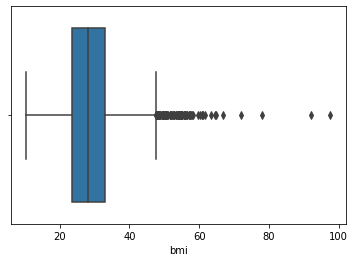

In [181]:
sns.boxplot(df['bmi'])

In [182]:
### we'll replace null values with median as it has outliers
df['bmi'].fillna(df['bmi'].median(),inplace=True)

In [183]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#### Outliers 

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

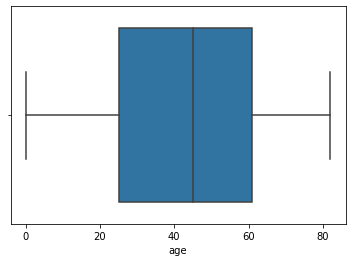

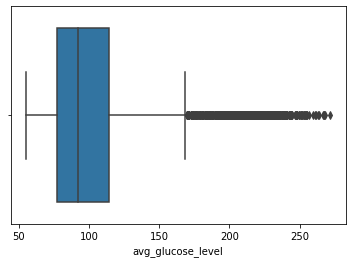

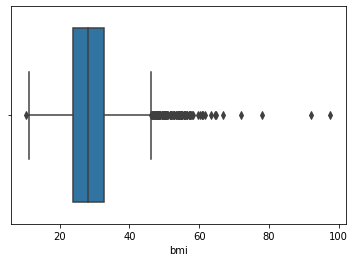

In [184]:
for i,col in enumerate(['age','avg_glucose_level','bmi']):
    plt.figure(i)
    sns.boxplot(df[col])

In [185]:
## columns bmi and abg_glucose_level have outliers
def removeOutlier(col):
    sorted(col)
    quant1,quant2=col.quantile([0.25,0.75])
    IQR=quant2-quant1
    lowerRange=quant1-(1.5*IQR)
    upperRange=quant2+(1.5*IQR)
    return lowerRange,upperRange
    

In [186]:
for col in ['bmi','avg_glucose_level']:
    low,high=removeOutlier(df[col])
    df[col]=np.where(df[col]>high,high,df[col])
    df[col]=np.where(df[col]<low,low,df[col])

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

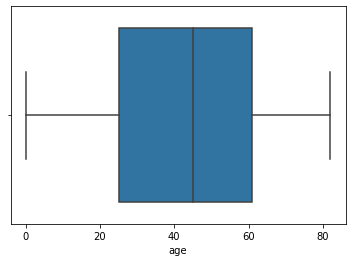

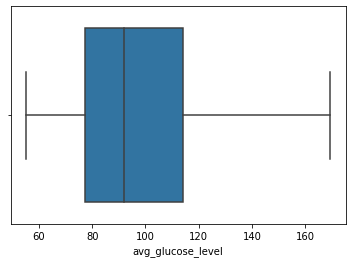

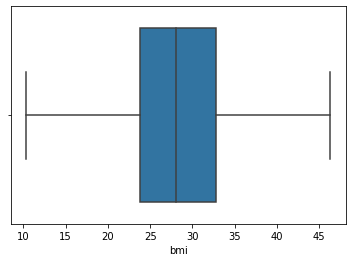

In [187]:
for i,col in enumerate(['age','avg_glucose_level','bmi']):
    plt.figure(i)
    sns.boxplot(df[col])

#### Encoding categorical features

In [188]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [189]:
for col in ['gender','ever_married','work_type','Residence_type','smoking_status']:
    print(col)
    print(df[col].unique())

gender
['Male' 'Female' 'Other']
ever_married
['Yes' 'No']
work_type
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type
['Urban' 'Rural']
smoking_status
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [190]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,169.3575,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,51676,61.0,0,0,169.3575,28.1,1,0,0,1,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.9200,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,169.3575,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,169.3575,24.0,1,0,0,1,0,0,1,0,0,0,1,0


#### Feature Selection- corr

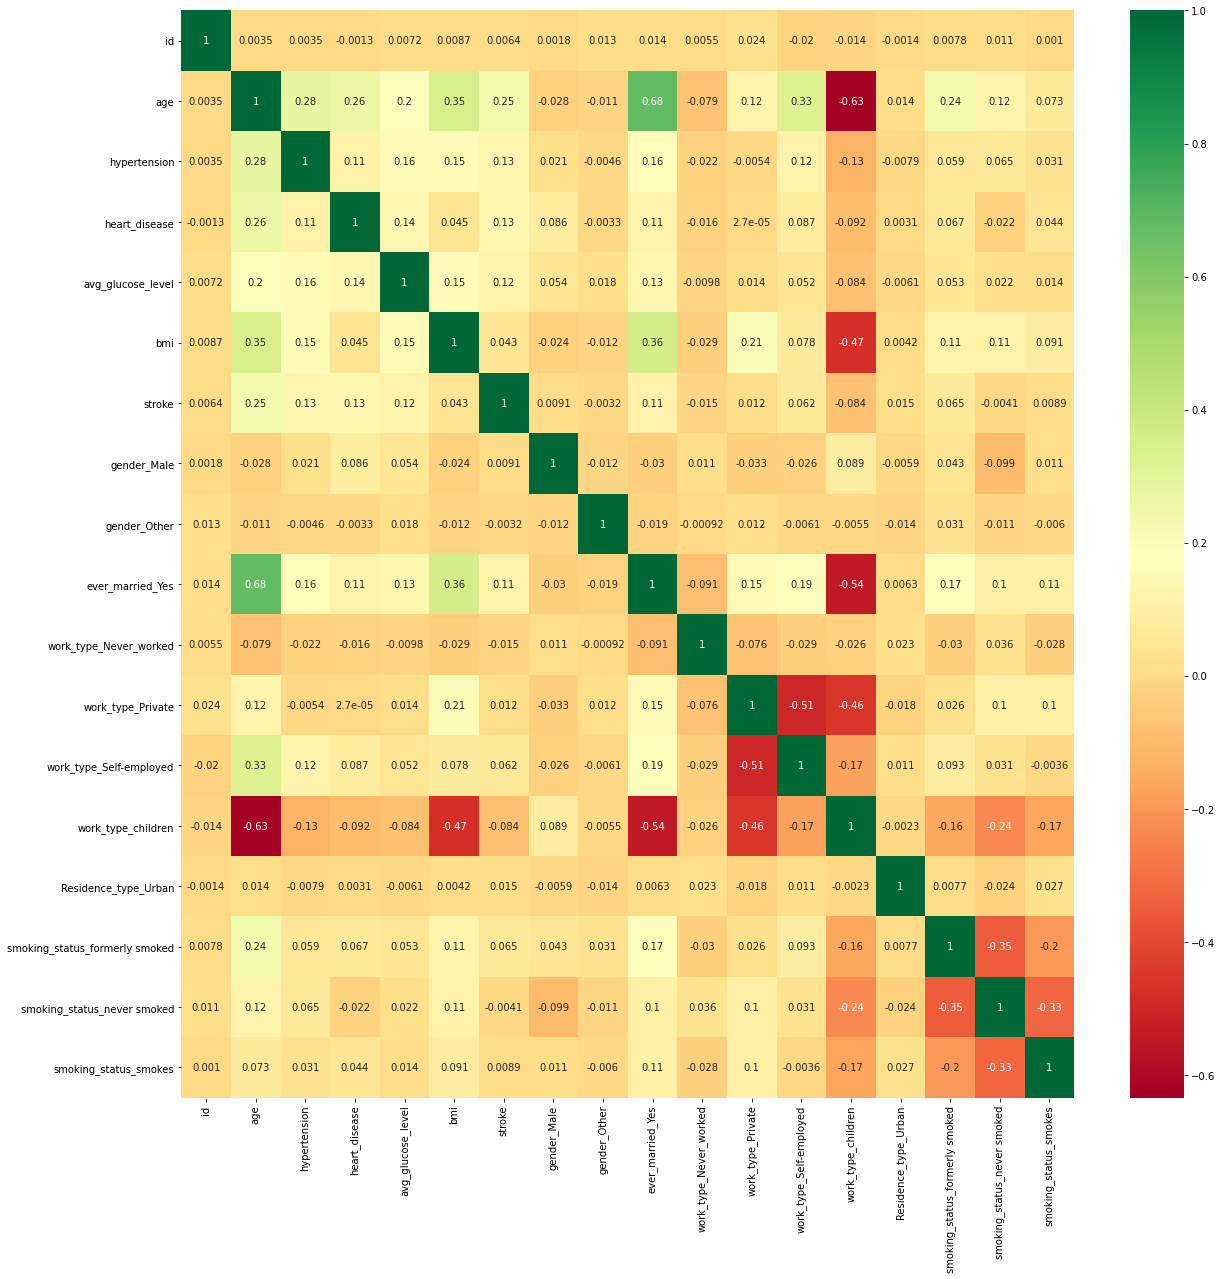

In [191]:
corrmat=df.corr() 
top_corr_features=corrmat.index 
plt.figure(figsize=(20,20)) #plot heat map 
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [192]:
df.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke', 'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [193]:
df.shape

(5110, 18)

In [194]:
X=df.drop(['id','stroke'],axis=1)
y=df['stroke']

In [195]:
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,169.3575,36.6,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,169.3575,28.1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.9200,32.5,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,169.3575,34.4,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,169.3575,24.0,0,0,1,0,0,1,0,0,0,1,0


In [196]:
X.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

#### Feature Importance



In [197]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

<AxesSubplot:>

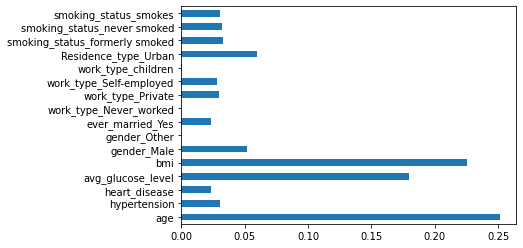

In [198]:
feat_imp=pd.Series(model.feature_importances_,index=X.columns)
feat_imp.plot(kind='barh')

In [199]:
X=df[['age','bmi','avg_glucose_level','Residence_type_Urban','gender_Male','smoking_status_formerly smoked','work_type_Private','smoking_status_never smoked','hypertension','heart_disease','smoking_status_smokes']]

In [200]:
X.shape

(5110, 11)

#### Handling Imbalanced Data

In [201]:
from imblearn.over_sampling  import SMOTE
from imblearn.under_sampling import NearMiss

In [202]:
smk = SMOTE(random_state=42)
X_res,y_res=smk.fit_resample(X,y)

In [203]:
from collections import Counter

print(Counter(y))
print(Counter(y_res))

Counter({0: 4861, 1: 249})
Counter({1: 4861, 0: 4861})


#### Model Building

In [204]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=0)


In [205]:
from sklearn.ensemble import RandomForestClassifier
rf_random=RandomForestClassifier()

In [206]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [1,3,4, 5,7,9]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [1, 3, 4, 5, 7, 9], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [207]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan 0.926707   0.9195063  0.91101979 0.92104931 0.90124756
 0.91063423        nan 0.92400693 0.92079196        nan 0.92477804
 0.92439234 0.90201897 0.92464964 0.93043573 0.90343323 0.92284977
        nan        nan 0.91037678 0.90137587 0.92387774 0.90330468
        nan        nan 0.927093   0.90291922 0.89520417 0.92310678
 0.90883382        nan 0.8936613  0.90253337        nan 0.90986248
 0.89571877 0.89597577 0.91101998 0.926064   0.89841889 0.90201892
        nan 0.91076239 0.90317623 0.90484799 0.92220627 0.92156357
 0.92966433 0.90381908        nan        nan        nan 0.90240467
 0.90227602 0.92117786 0.93069298 0.91140519 0.91101993 0.93082149
 0.89391851 0.92619265 0.93043573 0.89649022        nan        nan
 0.89610432 0.90330498 0.89571857 0.90266182 0.91076263 0.90973378
 0.89713318 0.92953563 0.90291903 0.

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [1, 3, 4, 5, 7, 9],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [208]:
best_grid=rf_randomcv.best_estimator_
best_grid

RandomForestClassifier(max_depth=560, min_samples_split=4, n_estimators=1600)

In [209]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [215]:
y_pred=rf_randomcv.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))


[[903  70]
 [ 57 915]]
Accuracy Score 0.9347043701799486
Classification report:               precision    recall  f1-score   support

           0       0.94      0.93      0.93       973
           1       0.93      0.94      0.94       972

    accuracy                           0.93      1945
   macro avg       0.93      0.93      0.93      1945
weighted avg       0.93      0.93      0.93      1945



In [216]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_classification_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_randomcv, file)

In [212]:
X_res.head()

,age,bmi,avg_glucose_level,Residence_type_Urban,gender_Male,smoking_status_formerly smoked,work_type_Private,smoking_status_never smoked,hypertension,heart_disease,smoking_status_smokes
0,67.0,36.6,169.3575,1,1,1,1,0,0,1,0
1,61.0,28.1,169.3575,0,0,0,0,1,0,0,0
2,80.0,32.5,105.9200,0,1,0,1,1,0,1,0
3,49.0,34.4,169.3575,1,0,0,1,0,0,0,1
4,79.0,24.0,169.3575,0,0,0,0,1,1,0,0


In [213]:
y_res.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64